In [19]:
""" Подключаем библиотеки """
import numpy as np # подключаем библиотеку для работы с массивами
import pandas as pd # подключаем библиотеку для работы с данными
import matplotlib.pyplot as plt # подключаем библиотеку для визуализации данных
import seaborn as sns # подключаем библиотеку для визуализации данных
from matplotlib.colors import ListedColormap # подключаем библиотеку для визуализации данных
# говорим компилятору, что графики нужно отображать в среде jupyter
%matplotlib inline
pd.options.mode.chained_assignment = None  # отключаем предупреждения

In [20]:
""" Загружаем данные о животных """
animal = pd.read_csv('zoo.csv') # загружаем в переменную данные о животных из файла
animal.head() # выводим порцию данных

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [21]:
animal.describe() # выводим статистику о каждом атрибуте (макс, мин, медиана и т.д.)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [22]:
animal.isnull().sum() # проверка есть ли в атрибутах пустые значения

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

In [23]:
print(animal.class_type.unique()) # выводим уникальные значения атрибута "класс"

[1 4 2 7 6 5 3]


In [24]:
duplicates = animal.duplicated() # инициализируем массив дублированных значений
duplicates[duplicates > 1] # проверяем есть ли дублированные значения

Series([], dtype: bool)

In [25]:
duplicates = animal.animal_name.value_counts() # проверяем есть ли дублированные имена
duplicates[duplicates > 1] # выводим дублированное имя на экран

frog    2
Name: animal_name, dtype: int64

In [26]:
frog = animal.loc[animal['animal_name'] == 'frog'] # записываем дублированное значение в переменную
frog # выводим его на экран для того чтобы посмотреть данные о нем

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


In [27]:
# просмотрев данные, мы увидели что одна лягушка ядовитая, а вторая нет
# изменяем имя ядовитой лягушки на venoumous_frog чтобы различать лягушек
animal['animal_name'][(animal.venomous == 1 )& (animal.animal_name == 'frog')] = "venoumous_frog"

In [28]:
# Join animal table and class table to show actual class names
ani_class = pd.read_csv('class.csv') # загружаем в переменную таблицу классов
# присоединяем таблицу классов к таблице животных, чтобы было видно название класса определенного животного и информация об этом классе
df = pd.merge(animal,ani_class,how='left',left_on='class_type',right_on='Class_Number')
df.head() # выводим порцию данных

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,fins,legs,tail,domestic,catsize,class_type,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,antelope,1,0,0,1,0,0,0,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
2,bass,0,0,1,0,0,1,1,1,1,...,1,0,1,0,0,4,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
3,bear,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
4,boar,1,0,0,1,0,0,1,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."


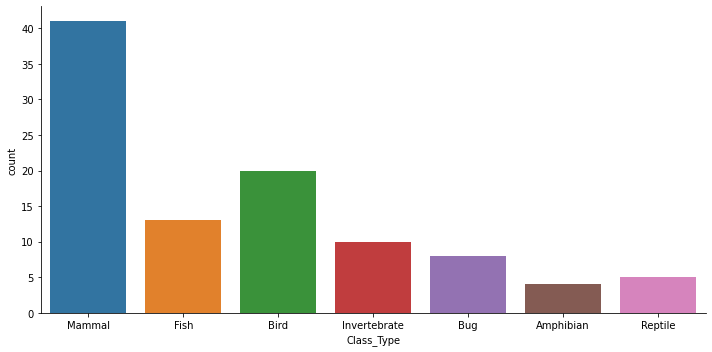

In [29]:
#выводим график встречаемости каждого класса
sns.catplot(x='Class_Type', data=df, kind="count",height = 5,aspect = 2)

In [30]:
from sklearn.model_selection import train_test_split # импортируем библиотеку для разделения данных
X = animal.iloc[:,1:17] # отпределяем независимые переменные (всё, кроме названия животного и его класса)
y = animal.iloc[:,17] # определяем зависимую переменную (класс)
# разделяем данные на 80% обучающей выборки и 20% тестовой выборки с соблюдением пропорций
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

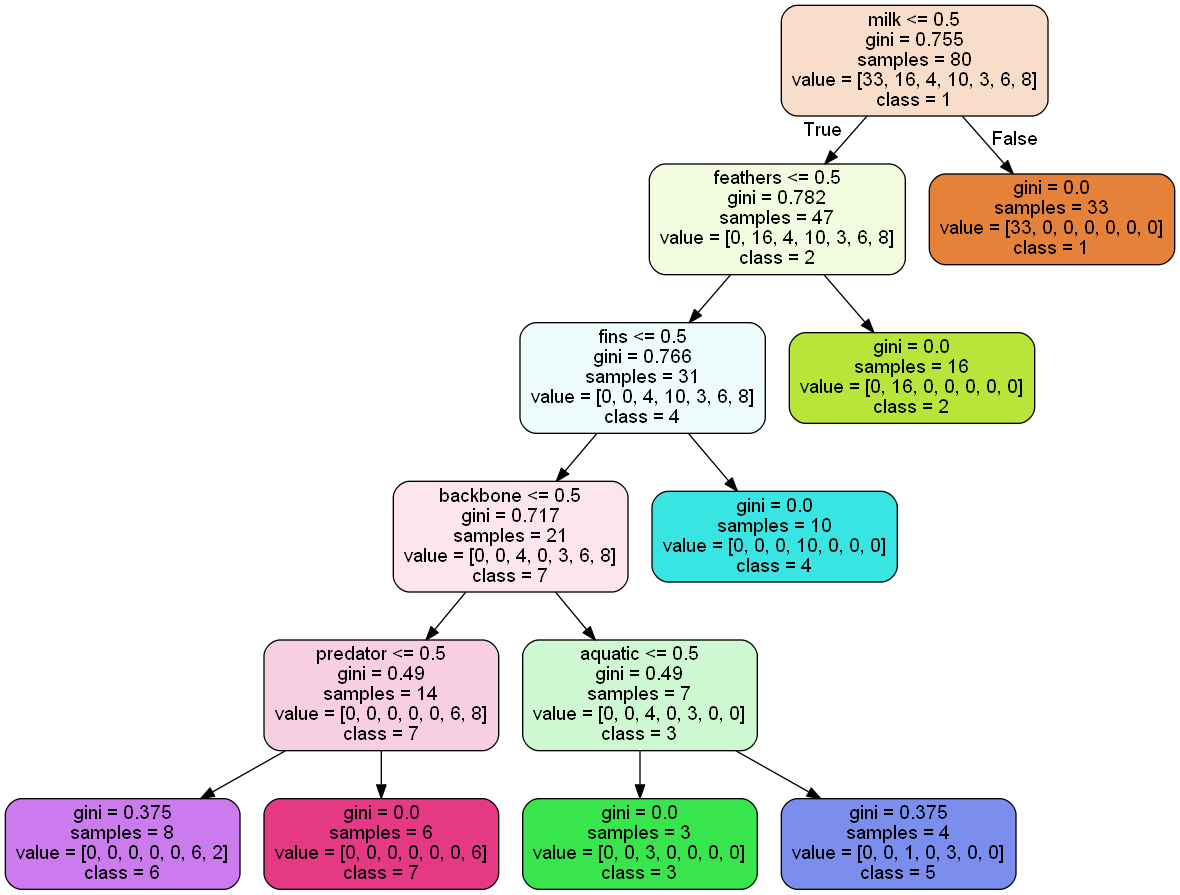

In [31]:
from pydotplus import graph_from_dot_data # подключаем библиотеку для работы с графиками
from sklearn.tree import export_graphviz # подключаем библиотеку для экспортирования дерева в dot формате
from IPython.display import Image # подключаем библиотеку для отображения картинок в jupyter
from sklearn.tree import DecisionTreeClassifier # подключаем библиотеку для работы с деревом классификации
from sklearn.metrics import accuracy_score # подключем библиотку для работы с точностью

clf = DecisionTreeClassifier(random_state = 0,criterion='gini', max_depth=5) # определяем модель
"""Ограничили дерево глубиной 5, чтобы точность на обучающей выборке не была 100%"""
clf.fit(X_train, y_train) # тренируем модель

global tree # определяем переменную дерева
tree = [] # определяем переменную дерева
tree = clf # записываем в него модель

dot_data = export_graphviz(tree,
                           filled=True, 
                           rounded=True,
                           class_names=["1","2","3","4","5","6","7" ],
                           feature_names=X.columns,
                           out_file=None) # экспортируем дерево в dot формате

graph = graph_from_dot_data(dot_data) # рисуем график по дереву dot формата

Image(graph.create_png()) # выводим отрисованное дерево на экран

In [32]:
test_accuracy = clf.score(X_test, y_test)
train_accuracy = clf.score(X_train, y_train)
print('Тренировочная точность: ', train_accuracy, ', тестовая точность: ', test_accuracy)

Тренировочная точность:  0.9625 , тестовая точность:  0.9523809523809523


In [33]:
""" Используем кросс-валидацию, т.к. мало данных """
from sklearn.model_selection import cross_val_score # подключаем библиотеку для проверки точности
score_tree=cross_val_score(clf, X,y, cv=4) # проверяем точность получаемых результатов
# выводим точность и отклонение
print("Средняя точность получаемых результатов: %0.2f (+/- %0.2f)" % (score_tree.mean(), score_tree.std() * 2))

Средняя точность получаемых результатов: 0.91 (+/- 0.04)
